# End-to-end example

In most of the examples we've had, the data is clean and simple, and the objective was well-defined. We have
often had a focus on just one step of the analysis or on one technique.

In this lesson, we are just going to start with a plan and work it through from there.

You have decided that the world would be better off if we had more bicycles and fewer cars, so you decide to investigate. You discover that the Divvy bike rental platform has recorded data on bicycle rentals in Chicago since 2013.

It is government-owned public data, so it's available. https://catalog.data.gov/dataset/divvy-trips

Here are some starting questions:

- How is Divvy doing? Is it growing? Is it shrinking? 

- If it weren't for the coronavirus, how many trips would we have expected for 2020?
  
- What factors predict bicycle usage?

In [2]:
import pandas as pd

In [ ]:
#divvy = pd.read_csv('\\Users\\gregb\\Downloads\\Divvy_Trips.csv')
#  Not enough memory!

In [3]:
import dask.dataframe

In [4]:
divvy = dask.dataframe.read_csv('\\Users\\gregb\\Downloads\\Divvy_Trips.csv')

In [5]:
divvy.columns

Index(['TRIP ID', 'START TIME', 'STOP TIME', 'BIKE ID', 'TRIP DURATION',
       'FROM STATION ID', 'FROM STATION NAME', 'TO STATION ID',
       'TO STATION NAME', 'USER TYPE', 'GENDER', 'BIRTH YEAR', 'FROM LATITUDE',
       'FROM LONGITUDE', 'FROM LOCATION', 'TO LATITUDE', 'TO LONGITUDE',
       'TO LOCATION'],
      dtype='object')

In [6]:
divvy.head(5)

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION
0,8546790,12/31/2015 05:35:00 PM,12/31/2015 05:44:00 PM,979,521,117,Wilton Ave & Belmont Ave,229,Southport Ave & Roscoe St,Subscriber,Female,1991.0,41.940180,-87.653040,POINT (-87.65304 41.94018),41.943739,-87.664020,POINT (-87.66402 41.943739)
1,8546793,12/31/2015 05:37:00 PM,12/31/2015 05:41:00 PM,1932,256,301,Clark St & Schiller St,138,Clybourn Ave & Division St,Subscriber,Male,1992.0,41.907993,-87.631501,POINT (-87.631501 41.907993),41.904613,-87.640552,POINT (-87.640552 41.904613)
2,8546795,12/31/2015 05:37:00 PM,12/31/2015 05:40:00 PM,1693,134,465,Marine Dr & Ainslie St,251,Clarendon Ave & Leland Ave,Subscriber,Female,1987.0,41.971600,-87.650154,POINT (-87.650154 41.9716),41.967968,-87.650001,POINT (-87.650001 41.967968)
3,8546797,12/31/2015 05:38:00 PM,12/31/2015 05:55:00 PM,3370,995,333,Ashland Ave & Blackhawk St,198,Green St (Halsted St) & Madison St,Subscriber,Male,1975.0,41.907066,-87.667252,POINT (-87.667252 41.907066),41.881892,-87.648789,POINT (-87.648789 41.881892)
4,8546798,12/31/2015 05:38:00 PM,12/31/2015 05:41:00 PM,2563,177,48,Larrabee St & Kingsbury St,111,Sedgwick St & Huron St,Subscriber,Male,1990.0,41.897764,-87.642884,POINT (-87.642884 41.897764),41.894666,-87.638437,POINT (-87.638437 41.894666)


In [7]:
divvy['start_date'] = divvy['START TIME'].str.split(' ').map(lambda x: x[0])

In [8]:
divvy.start_date.head(5)

0    12/31/2015
1    12/31/2015
2    12/31/2015
3    12/31/2015
4    12/31/2015
Name: start_date, dtype: object

In [10]:
trips_by_date = divvy.groupby('start_date')['TRIP ID'].count()

In [11]:
trips_by_date.head(1)

start_date
01/01/2014    123
Name: TRIP ID, dtype: int64

In [ ]:
trips_by_date.compute()

In [ ]:
trips_by_date.reset_index().to_csv('divvy_daily_trips.csv')

In [19]:
divvy_daily_trips = pd.read_csv('divvy_daily_trips.csv', parse_dates=['start_day'], index_col='start_day')

In [20]:
%matplotlib inline

In [21]:
divvy_daily_trips.dtypes

Unnamed: 0    int64
TRIP ID       int64
dtype: object

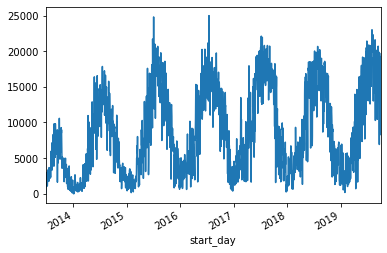

In [22]:
divvy_daily_trips['TRIP ID'].plot()

In [28]:
divvy2018 = divvy_daily_trips['2018']
divvy2019 = divvy_daily_trips['2019']
divvy2018.shape, divvy2019.shape

((365, 2), (273, 2))

In [30]:
import scipy.stats

In [31]:
scipy.stats.mannwhitneyu(divvy2018['TRIP ID'], divvy2019['TRIP ID'])

MannwhitneyuResult(statistic=42801.5, pvalue=0.0011527763124675185)

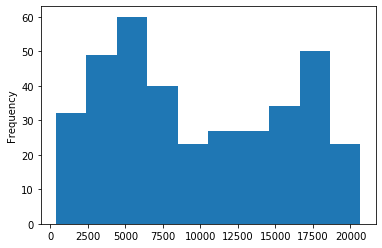

In [32]:
divvy2018['TRIP ID'].plot.hist()

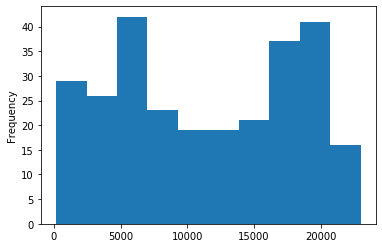

In [33]:
divvy2019['TRIP ID'].plot.hist()